In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve
from scipy.spatial.distance import cityblock, mahalanobis, euclidean
from array import array
import matplotlib.pyplot as plt

In [3]:
#To calculate the equal-error rate, the threshold is chosen so that the detector’s miss and false-alarm rates are equal
def evaluateEER(user_scores, imposter_scores):
    labels = [0]*len(user_scores) + [1]*len(imposter_scores)
    fpr, tpr, thresholds = roc_curve(labels, user_scores + imposter_scores)
    missrates = 1 - tpr #The hit rate is the frequency with which impostors are detected (i.e., 1 − miss rate), frr
    farates = fpr  #false-alarm rate is the frequency with which genuine users are mistakenly detected as impostors,far
    return np.mean(missrates),np.mean(farates)

class EuclideanDetector:    
    def __init__(self, subjects):
        self.user_scores = []
        self.imposter_scores = []
        self.mean_vector = []
        self.subjects = subjects
        
    def training(self):
        self.mean_vector = self.train.mean().values
        self.std_vector = self.train.std().values
        dropping_indices = []
        
        for i in range(self.train.shape[0]):
            cur_score = euclidean(self.train.iloc[i].values, self.mean_vector)            
            if (cur_score > 3 * self.std_vector).all() == True: dropping_indices.append(i)   
                
        self.train = self.train.drop(self.train.index[dropping_indices])
        self.mean_vector = self.train.mean().values
        
    def testing(self):
        for i in range(self.test_genuine.shape[0]):
            cur_score = np.linalg.norm(self.test_genuine.iloc[i].values - self.mean_vector)
            self.user_scores.append(cur_score)
            
        for i in range(self.test_imposter.shape[0]):
            cur_score = np.linalg.norm(self.test_imposter.iloc[i].values - self.mean_vector)
            self.imposter_scores.append(cur_score)
    
    def evaluate(self):
        eers = []
        
        for subject in subjects:            
            self.user_scores = []
            self.imposter_scores = []
    
            # Consider current subject as genuine and rest as imposters
            genuine_user_data = data.loc[data.subject == subject, "H.period":"H.Return"]
            imposter_data = data.loc[data.subject != subject, :]
    
            # genuine user's first 200 time vectors for training
            self.train = genuine_user_data[:200]
    
            # True set (200 records)
            self.test_genuine = genuine_user_data[200:]
    
            # False set (250 records, 5 per imposter, 50 imposters in all)
            self.test_imposter = imposter_data.groupby("subject").head(10).loc[:, "H.period":"H.Return"]
            
            self.training()
            
            self.testing()
    
            eers.append(evaluateEER(self.user_scores, self.imposter_scores))
        
        return eers

path = "DSL-StrongPasswordData.csv" 
dataframe = pd.read_csv(path)
data = dataframe.loc[:, ~dataframe.columns.str.startswith('DD')]
subjects = data["subject"].unique()  
# print ("Average EER for Ecludian detector:")
array= EuclideanDetector(subjects).evaluate()
subject = np.array(subjects)
newDataFrame = pd.DataFrame(array, columns= ['FRR','FAR'])
newDataFrame['Subject'] = subject
newDataFrame=newDataFrame.reset_index()

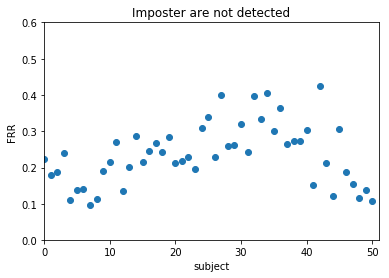

In [4]:
#for outliers analysis
x=newDataFrame.loc[:,'index']
y=newDataFrame.loc[:,'FRR']
plt.xlim(0.001,51)
plt.ylim(0.001,0.6)
plt.scatter(x,y)

plt.title('Imposter are not detected')
plt.xlabel('subject')
plt.ylabel('FRR')
plt.show()


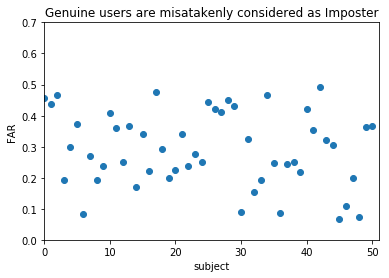

In [7]:
#for outliers analysis
x=newDataFrame.loc[:,'index']
y=newDataFrame.loc[:,'FAR']
plt.xlim(0.001,51)
plt.ylim(0.001,0.7)
plt.scatter(x,y)

plt.title('Genuine users are misatakenly considered as Imposter')
plt.xlabel('subject')
plt.ylabel('FAR')
plt.show()
